In [1]:
import numpy as np
import pandas as pd

In [2]:
Data=pd.read_csv("labeled_data.csv")

In [3]:
Data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [4]:
Data["label"]=Data["class"].map({0:"offense",1:"hate",2:"good"})

In [5]:
data=Data[["tweet","label"]]

In [6]:
data

,tweet,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,good
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,hate
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,hate
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,hate
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,hate
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,hate
24779,"you've gone and broke the wrong heart baby, an...",good
24780,young buck wanna eat!!.. dat nigguh like I ain...,hate
24781,youu got wild bitches tellin you lies,hate


In [7]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kushw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [10]:
def clean(text):
    (text)=str(text).lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
     # Stop word removal
    stopwords_set = set(stopwords.words('english'))
    text = [word for word in text.split() if word not in stopwords_set]
    text = " ".join(text)
    
    # Stemming the text
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text.split()]
    text = " ".join(text)
    
    return text
data["tweet"]=data["tweet"].apply(clean)

C:\Users\kushw\AppData\Local\Temp\ipykernel_9932\3970724248.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"]=data["tweet"].apply(clean)


In [11]:
data

,tweet,label
0,rt mayasolov woman shouldnt complain clean hou...,good
1,rt mleew17 boy dat coldtyga dwn bad cuffin dat...,hate
2,rt urkindofbrand dawg rt 80sbaby4lif ever fuck...,hate
3,rt cganderson vivabas look like tranni,hate
4,rt shenikarobert shit hear might true might fa...,hate
...,...,...
24778,you muthafin lie 8220lifeask 20pearl coreyeman...,hate
24779,youv gone broke wrong heart babi drove redneck...,good
24780,young buck wanna eat dat nigguh like aint fuck...,hate
24781,youu got wild bitch tellin lie,hate


In [12]:
X=np.array(data["tweet"])
y=np.array(data["label"])

In [13]:
X

array(['rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       'rt mleew17 boy dat coldtyga dwn bad cuffin dat hoe 1st place',
       'rt urkindofbrand dawg rt 80sbaby4lif ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin di',
       'youu got wild bitch tellin lie',
       'ruffl ntac eileen dahlia beauti color combin pink orang yellow amp white coll'],
      dtype=object)

In [14]:
y

array(['good', 'hate', 'hate', ..., 'hate', 'hate', 'good'], dtype=object)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [16]:
cv=CountVectorizer()

In [17]:
X=cv.fit_transform(X)

In [18]:
X

<24783x33711 sparse matrix of type '<class 'numpy.int64'>'
	with 212054 stored elements in Compressed Sparse Row format>

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [20]:
X_train

<16604x33711 sparse matrix of type '<class 'numpy.int64'>'
	with 142180 stored elements in Compressed Sparse Row format>

In [21]:
#Building ML model
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred=dt.predict(X_test)

In [25]:
#conclusion matrix and accuracy
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[1170,  173,   36],
       [ 263, 5849,  223],
       [  45,  269,  151]], dtype=int64)

In [26]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

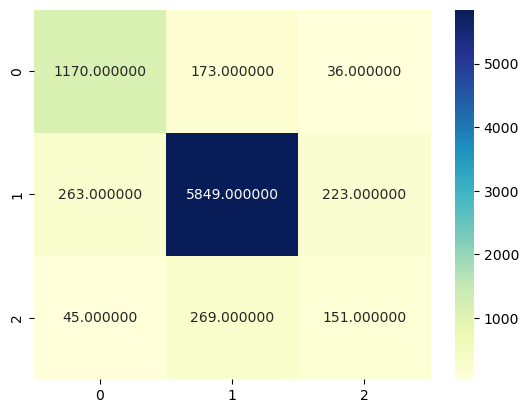

In [27]:
sns.heatmap(cm,annot= True,fmt="1f",cmap="YlGnBu")

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [29]:
sample="let kill the people who did'nt follow the rules"
sample=clean(sample)

In [31]:
sample

'let kill peopl didnt follow rule'

In [32]:
data1=cv.transform([sample]).toarray()

In [33]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
dt.predict(data1)

array(['hate'], dtype=object)